In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta

# Part 1 - Data cleaning and quality check

We are currently running a randomized evaluation in Sierra Leone, and are sending the data from a survey collected daily to you. Your responsibility is to implement data cleaning and quality checks.

## Question 1

You have obtained a data set called Test_dataset_round1.csv, which is the main data set of the project. Additionally, a new round of data collection took place with new respondents so there is a separate data set called Test_dataset_round2.csv. Combine these two datasets.


In [ ]:
parse_dates = ['vaccinegc_date_1', 'vaccinegc_date_2', 'vaccinegc_date_3', 'vaccinegc_date_4', 'vaccinegc_date_5', 'dob', 'surveydate']
df1 = pd.read_csv('Test_dataset_round1.csv', parse_dates=parse_dates)
df2 = pd.read_csv('Test_dataset_round2.csv', parse_dates=parse_dates)

df = pd.concat([df1, df2], axis=0)

df

,clinic_name,end_interview,start_interview,caregiver_id,enumerator,vaccinegc_date_1,vaccinegc_date_2,vaccinegc_date_3,vaccinegc_date_4,vaccinegc_date_5,dob,surveydate,condition,last_vaccine,distance_highway,fines
0,Bonkababay,18471.0,17666.0,144,Dorah,2019-06-28,2019-07-22,2019-09-26,2019-10-20,2019-11-22,2019-06-20,2021-02-25,Control,Measles 1,9.120001,1
1,Bonkababay,1498.0,359.0,10,Hannah,NaT,NaT,NaT,NaT,NaT,2019-08-23,2021-03-02,Control,Measles 1,8.835000,0
2,Bonkababay,1953.0,892.0,4155,Dorah,2020-10-30,2020-12-11,NaT,2021-02-12,NaT,2020-10-23,2021-02-28,Control,Penta 1,8.929999,1
3,Bonkababay,22173.0,21317.0,41,Dorah,NaT,NaT,NaT,NaT,NaT,2018-04-24,2021-03-01,Control,Measles 1,8.170000,1
4,Bonkababay,5337.0,4243.0,2065,Dorah,2020-10-01,2020-12-04,2021-01-22,NaT,NaT,2020-09-30,2021-02-25,Control,Measles 1,7.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Yankasa,13604.0,12357.0,37,Umu,2018-08-25,2018-09-25,2018-10-25,2018-11-25,NaT,2018-08-06,2021-03-23,Treatment,Penta 3,5.000000,1
1071,Yankasa,11941.0,10811.0,693,John,2020-04-25,2020-05-25,2020-06-25,2020-07-25,2020-10-25,2020-04-07,2021-03-22,Treatment,Measles 1,9.300000,0
1072,Yankasa,4872.0,3887.0,4397,John,NaT,NaT,NaT,NaT,NaT,2019-12-02,2021-03-24,Treatment,Penta 3,4.200000,1
1073,Yankasa,4702.0,3627.0,2761,John,NaT,NaT,NaT,NaT,NaT,2019-12-10,2021-03-27,Treatment,Measles 1,1.600000,1


In [ ]:
df.dtypes

clinic_name                 object
end_interview              float64
start_interview            float64
caregiver_id                 int64
enumerator                  object
vaccinegc_date_1    datetime64[ns]
vaccinegc_date_2    datetime64[ns]
vaccinegc_date_3    datetime64[ns]
vaccinegc_date_4    datetime64[ns]
vaccinegc_date_5    datetime64[ns]
dob                 datetime64[ns]
surveydate          datetime64[ns]
condition                   object
last_vaccine                object
distance_highway           float64
fines                        int64
dtype: object

## Question 2

Now that we have a complete and up to date data set, you should check the quality of the data. This will inform our cleaning work and indicate whether there have been problems with the administration of our survey.

### Question 2.a

Calculate the average and median interview time. Does this average value mask important differences across surveyors?

In [ ]:
df['interview_duration'] = df['end_interview'] - df['start_interview']

df[['start_interview', 'end_interview', 'interview_duration']].describe()

,start_interview,end_interview,interview_duration
count,3472.000000,3467.000000,3466.000000
mean,8392.010945,9676.948947,1291.130698
std,6782.924252,6907.778447,952.308239
min,63.000000,682.000000,-6232.000000
25%,3113.500000,4264.000000,950.000000
50%,6944.000000,8201.000000,1147.500000
75%,12033.500000,13413.000000,1408.000000
max,49285.000000,50113.000000,20838.000000


In [ ]:
df[['start_interview', 'end_interview', 'interview_duration']].median()

start_interview       6944.0
end_interview         8201.0
interview_duration    1147.5
dtype: float64

### Question 2.b

The data set includes each child’s date of birth and vaccination dates. Do you see any inconsistent entries across these variables? What are the most recurrent problems?

The vaccines should have been taken after the birth date.

In [ ]:
def check_vaccine_agains_dob(vaccine_id):
    vaccine_after_dob = 'vaccine_{}_after_dob'.format(vaccine_id)
    vaccine_id = 'vaccinegc_date_{}'.format(vaccine_id)
    df[vaccine_after_dob] = df[vaccine_id].isna() | (df[vaccine_id] >= df['dob'])
    vaccine_after_dob_query = df[vaccine_after_dob]

    invalid_vaccine_dates = df[vaccine_after_dob_query == False][['dob', vaccine_id]]
    print('Out of {} entries, {} entries had a {} before than the DOB'.format(len(df), len(invalid_vaccine_dates), vaccine_id))
    print(invalid_vaccine_dates.head())
    print('----------------')
    print()
    return vaccine_after_dob


check_vaccine_against_dob_labels = [check_vaccine_agains_dob(i) for i in range(1, 6)]

Out of 3473 entries, 96 entries had a vaccinegc_date_1 before than the DOB
          dob vaccinegc_date_1
6  2019-07-29       2019-07-12
37 2021-10-29       2020-11-30
42 2019-01-13       2019-01-12
57 2020-02-15       2019-02-22
99 2020-05-15       2019-05-16
----------------

Out of 3473 entries, 74 entries had a vaccinegc_date_2 before than the DOB
           dob vaccinegc_date_2
37  2021-10-29       2020-12-11
57  2020-02-15       2019-03-22
99  2020-05-15       2019-06-30
141 2021-04-20       2020-06-04
142 2020-07-28       2019-09-26
----------------

Out of 3473 entries, 68 entries had a vaccinegc_date_3 before than the DOB
           dob vaccinegc_date_3
57  2020-02-15       2019-04-23
99  2020-05-15       2019-07-30
141 2021-04-20       2020-07-09
142 2020-07-28       2019-09-11
159 2021-06-18       2020-10-15
----------------

Out of 3473 entries, 55 entries had a vaccinegc_date_4 before than the DOB
           dob vaccinegc_date_4
57  2020-02-15       2019-05-24
99  2020-05-

And each vaccine date should be after the previous

In [ ]:
def check_vaccine_with_next(vid):
    vaccine_id = 'vaccinegc_date_{}'.format(vid)
    next_vaccine_id = 'vaccinegc_date_{}'.format(vid + 1)

    # If vaccine (vid+1) was provided, then vaccine (vid) should be provided
    vaccine_before_valid = df[next_vaccine_id].isna() | df[vaccine_id].notna()

    # If vaccine (vid) was provided and vaccine (vid+1) was provided, then vaccine (vid) should be before vaccine (vid+1)
    vaccine_after_valid = ~(df[next_vaccine_id].notna() & df[vaccine_id].notna()) | (df[vaccine_id] <= df[next_vaccine_id])

    before_valid_label = 'vaccine_before_valid_{}'.format(vid)
    after_valid_label = 'vaccine_after_valid_{}'.format(vid)
    df['vaccine_before_valid_{}'.format(vid)] = vaccine_before_valid
    df['vaccine_after_valid_{}'.format(vid)] = vaccine_after_valid

    cols = [vaccine_id, next_vaccine_id]
    vaccine_before_invalid_df = df[vaccine_before_valid == False][cols]
    vaccine_after_invalid_df = df[vaccine_after_valid == False][cols]
    print('Out of {} entries, {} entries had a "{}" but not a "{}"'.format(len(df), len(vaccine_before_invalid_df), next_vaccine_id, vaccine_id))
    print(vaccine_before_invalid_df.head())

    print('Out of {} entries, {} entries had a \"{}\" before than the next vaccine'.format(len(df), len(vaccine_before_invalid_df), vaccine_id))
    print(vaccine_after_invalid_df.head())
    print('----')
    print()

    return [before_valid_label, after_valid_label]

check_vaccine_with_next_labels = [l for i in range(1, 5) for l in check_vaccine_with_next(i)]



Out of 3473 entries, 4 entries had a "vaccinegc_date_2" but not a "vaccinegc_date_1"
     vaccinegc_date_1 vaccinegc_date_2
362               NaT       2019-07-19
433               NaT       2019-10-03
476               NaT       2019-03-25
1177              NaT       2019-08-13
Out of 3473 entries, 4 entries had a "vaccinegc_date_1" before than the next vaccine
    vaccinegc_date_1 vaccinegc_date_2
84        2020-12-28       2020-02-10
154       2019-12-19       2019-10-24
180       2020-07-09       2020-04-23
276       2020-10-30       2020-10-14
354       2020-11-18       2020-10-22
----

Out of 3473 entries, 91 entries had a "vaccinegc_date_3" but not a "vaccinegc_date_2"
    vaccinegc_date_2 vaccinegc_date_3
80               NaT       2020-11-02
97               NaT       2020-10-29
161              NaT       2018-10-25
202              NaT       2018-08-10
235              NaT       2018-03-16
Out of 3473 entries, 91 entries had a "vaccinegc_date_2" before than the next vaccine
 

## Question 3


A key component of data cleaning is removing personally identifiable information (PII). When working with this dataset, we wouldn’t want surveyor names to be known. Create a numerical variable where each surveyor corresponds to a number.

In [ ]:
enumerator = df['enumerator']
enumerator_categorized = enumerator.astype('category')
df['enumerator_id'] = df['enumerator'].factorize()[0]

df = df.drop('enumerator', axis=1)
df['enumerator_id'].head()

0    0
1    1
2    0
3    0
4    0
Name: enumerator_id, dtype: int64

## Question 4

Is the caregiver_id variable unique (i.e. different value for each observation) in the dataset? If it isn’t, list out these duplicated IDs. What steps would you recommend taking to resolve an issue of duplicate IDs?

In [ ]:
dups = df.duplicated(subset=['caregiver_id'], keep=False) == True
print('Found {} duplicate ids'.format(len(df[dups])))
df[dups][['caregiver_id']]

Found 16 duplicate ids


,caregiver_id
149,4192
181,1498
190,1498
1084,1508
1120,1508
1212,2073
1326,2073
1482,3645
1531,3645
1655,704


In [ ]:
df = df[~dups]

entries_before = len(df)
for l in check_vaccine_against_dob_labels + check_vaccine_with_next_labels:
    df = df[df[l]]

df = df.drop(check_vaccine_against_dob_labels + check_vaccine_with_next_labels, axis=1)

print('After cleaning the data from the dates, we have {} entries. Before {} entries'.format(len(df), entries_before))

After cleaning the data from the dates, we have 2897 entries. Before 3457 entries


# Part 2

The objective of the randomized evaluation is to test the impact of health worker training on immunization completion for children under one year of age. Half of the clinics were assigned to the training program, and half were assigned to control, as indicated by the variable condition. We define complete immunization in a simplified way here using the last vaccine received by age 1, indicated by the variable last_vaccine. Measles 1 is the last vaccine in the under-one schedule

In [ ]:
for i in range(1, 6):
    df['has_vaccine_{}'.format(i)] = df['vaccinegc_date_{}'.format(i)].notna()

df['has_all_vaccines'] = df['has_vaccine_1'] & df['has_vaccine_2'] & df['has_vaccine_3'] & df['has_vaccine_4'] & df['has_vaccine_5']

measles_1 = 'Measles 1'
one_year_old = df[((df['surveydate'] - df['dob']) < timedelta(days=365)) & (df['last_vaccine'] == measles_1)]

has_vaccines_condition_group_by = one_year_old.groupby(['has_all_vaccines', 'condition']).size()
has_vaccines_condition_group_by

has_all_vaccines  condition
False             Control      120
                  Treatment    124
True              Control      179
                  Treatment    197
dtype: int64

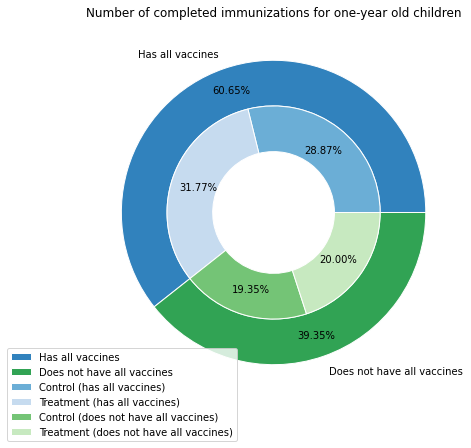

In [ ]:
values_to_plot = np.array([has_vaccines_condition_group_by.get(True).values, has_vaccines_condition_group_by.get(False).values])

fig, ax = plt.subplots(figsize=(8, 7))

size = 0.3
vals = values_to_plot

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(2)*8)
inner_colors = cmap([1, 3, 9, 11])

def absolute_value(val):
    a  = np.round(val/100.*values_to_plot.sum(), 0)
    return a

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.2f%%', pctdistance=0.85,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Has all vaccines', 'Does not have all vaccines'])

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, autopct='%1.2f%%', pctdistance=0.75,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Control (has all vaccines)', 'Treatment (has all vaccines)', 'Control (does not have all vaccines)', 'Treatment (does not have all vaccines)'], labeldistance=None)

ax.set(aspect="equal", title='Number of completed immunizations for one-year old children')


plt.legend(loc=(-0.2, -0.1))
plt.show()

## Question 5

Does the data suggest that random assignment across treatment and control clinics was successfully conducted? Please provide a rationale for your conclusion and demonstrate analysis of data in your answer.

### Answer

In the pie chart, we can see that the percentages on both sections (has all vs doesn't have all vaccines) for the two conditions ("Treatment", "Control") are fairly similar. Which indicates us that the random assignment was successful.

## Question 6

Was the program successful? What factors other than the treatment assignment might influence the effect of the program? Do results differ when you take those into account?

### Answer

If we look at the pie chart, we can see that on the samples of one-year old children that were vaccinated with Measles 1, 60.65% have all vaccines, while 39.36% don't have all vaccines. This ration of vaccinated vs non-vaccinated holds inside each of the assignments (control vs treatment).